<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/Fama_French_5_Factor_on_NIFTY50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import the necessary packages
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
# Download the closing prices from the Nifty50 from Yahoofinance for each stock from the last 8 years
nifty50 = ["ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", "AXISBANK.NS",
           "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS", "BPCL.NS", "BHARTIARTL.NS",
           "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS",
           "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS",
           "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNIVER.NS", "ICICIBANK.NS", "ITC.NS",
           "INDUSINDBK.NS", "INFRATEL.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS",
           "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS", "POWERGRID.NS",
           "RELIANCE.NS", "SBILIFE.NS", "SBIN.NS", "SUNPHARMA.NS", "TCS.NS",
           "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS", "TITAN.NS",
           "ULTRACEMCO.NS", "UPL.NS", "WIPRO.NS"]

end = datetime.date.today()
start = end - pd.DateOffset(years=8)

df = pd.DataFrame()

for stock in nifty50:
  df[stock] = yf.download(stock, start, end)["Adj Close"]
df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2016-09-06    38.460068     258.769989    1365.769531    1135.679932   
2016-09-07    38.646770     260.347870    1338.403687    1110.262329   
2016-09-08    39.713619     263.551392    1326.300293    1115.355347   
2016-09-09    39.180199     260.300079    1315.412598    1105.122314   
2016-09-12    37.313202     248.633392    1276.380615    1088.947510   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BAJAJFINSV.NS  \
Date                                                                   
2016-09-06   626.203552    2422.151855    1101.146973     306.319122   
2016-09-07   615.568176    2406.836182    1113.604126     304.709503   
2016-09-08   619.753418    2489.783203    1136.544312     311.890381   
2016-09-09   603.751160    2447.664795    1127.503418     302.422272   
2016-09-12   583.071411    2381.927979    1069.688965     293.302917   

               BPCL.NS  BHARTIARTL.NS  ...  SUNPHARMA.NS       TCS.NS  \
Date                                   ...                              
2016-09-06  122.369171     277.841492  ...    730.541443  1077.276733   
2016-09-07  120.570206     276.674866  ...    727.367920  1058.411865   
2016-09-08  120.038742     280.347656  ...    755.219604  1007.042725   
2016-09-09  120.314690     278.359985  ...    745.312622  1020.204224   
2016-09-12  115.684448     274.859985  ...    735.592407  1023.066895   

            TATACONSUM.NS  TATAMOTORS.NS  TATASTEEL.NS    TECHM.NS  \
Date                                                                 
2016-09-06     129.821915     585.065430     13.908463  386.253540   
2016-09-07     130.234024     583.773499     14.059895  379.655701   
2016-09-08     130.234024     580.593262     14.530424  369.356689   
2016-09-09     127.944405     569.710815     14.227555  368.753204   
2016-09-12     123.914680     550.033081     13.459568  373.218842   

              TITAN.NS  ULTRACEMCO.NS      UPL.NS    WIPRO.NS  
Date                                                           
2016-09-06  419.567169    3946.815674  396.968231  175.514801  
2016-09-07  407.913849    3957.276855  404.871429  175.096802  
2016-09-08  415.155243    3986.092041  403.952423  172.261841  
2016-09-09  406.618988    3829.519531  404.656982  174.696991  
2016-09-12  394.486145    3744.719238  397.672729  174.606155  

[5 rows x 49 columns]

In [9]:
# Count NaNs for each column
nan_counts = df.isnull().sum()
print(nan_counts)
# Iterate over columns and apply NaN handling logic
for col in df.columns:
  if nan_counts[col] > 50:
    df.drop(col, axis=1, inplace=True)
  else:
    if df[col].isnull().iloc[0]:
      df[col].fillna(method='bfill', inplace=True)
    else:
      df[col].fillna(method='ffill', inplace=True)


ADANIENT.NS         0
ADANIPORTS.NS       0
APOLLOHOSP.NS       0
ASIANPAINT.NS       0
AXISBANK.NS         0
BAJAJ-AUTO.NS       0
BAJFINANCE.NS       0
BAJAJFINSV.NS       0
BPCL.NS             0
BHARTIARTL.NS       0
BRITANNIA.NS        0
CIPLA.NS            0
COALINDIA.NS        0
DIVISLAB.NS         0
DRREDDY.NS          0
EICHERMOT.NS        0
GRASIM.NS           0
HCLTECH.NS          0
HDFCBANK.NS         0
HDFCLIFE.NS       297
HEROMOTOCO.NS       0
HINDALCO.NS         0
HINDUNIVER.NS    1974
ICICIBANK.NS        0
ITC.NS              0
INDUSINDBK.NS       0
INFRATEL.NS      1974
JSWSTEEL.NS         0
KOTAKBANK.NS        0
LT.NS               0
M&M.NS              0
MARUTI.NS           0
NESTLEIND.NS        0
NTPC.NS             0
ONGC.NS             0
POWERGRID.NS        0
RELIANCE.NS         0
SBILIFE.NS        265
SBIN.NS             0
SUNPHARMA.NS        0
TCS.NS              0
TATACONSUM.NS       0
TATAMOTORS.NS       0
TATASTEEL.NS        0
TECHM.NS            0
TITAN.NS  

<ipython-input-9-b121ff53783c>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='ffill', inplace=True)
<ipython-input-9-b121ff53783c>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='ffill', inplace=True)
<ipython-input-9-b121ff53783c>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='ffill', inplace=True)
<ipython-input-9-b121ff53783c>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='ffill', inplace=True)
<ipython-input-9-b121ff53783c>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

In [10]:
nan_counts = df.isnull().sum()
print(nan_counts)

ADANIENT.NS      0
ADANIPORTS.NS    0
APOLLOHOSP.NS    0
ASIANPAINT.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJFINANCE.NS    0
BAJAJFINSV.NS    0
BPCL.NS          0
BHARTIARTL.NS    0
BRITANNIA.NS     0
CIPLA.NS         0
COALINDIA.NS     0
DIVISLAB.NS      0
DRREDDY.NS       0
EICHERMOT.NS     0
GRASIM.NS        0
HCLTECH.NS       0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
ICICIBANK.NS     0
ITC.NS           0
INDUSINDBK.NS    0
JSWSTEEL.NS      0
KOTAKBANK.NS     0
LT.NS            0
M&M.NS           0
MARUTI.NS        0
NESTLEIND.NS     0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SUNPHARMA.NS     0
TCS.NS           0
TATACONSUM.NS    0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TECHM.NS         0
TITAN.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
WIPRO.NS         0
dtype: int64


<ipython-input-11-c296961a01ca>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


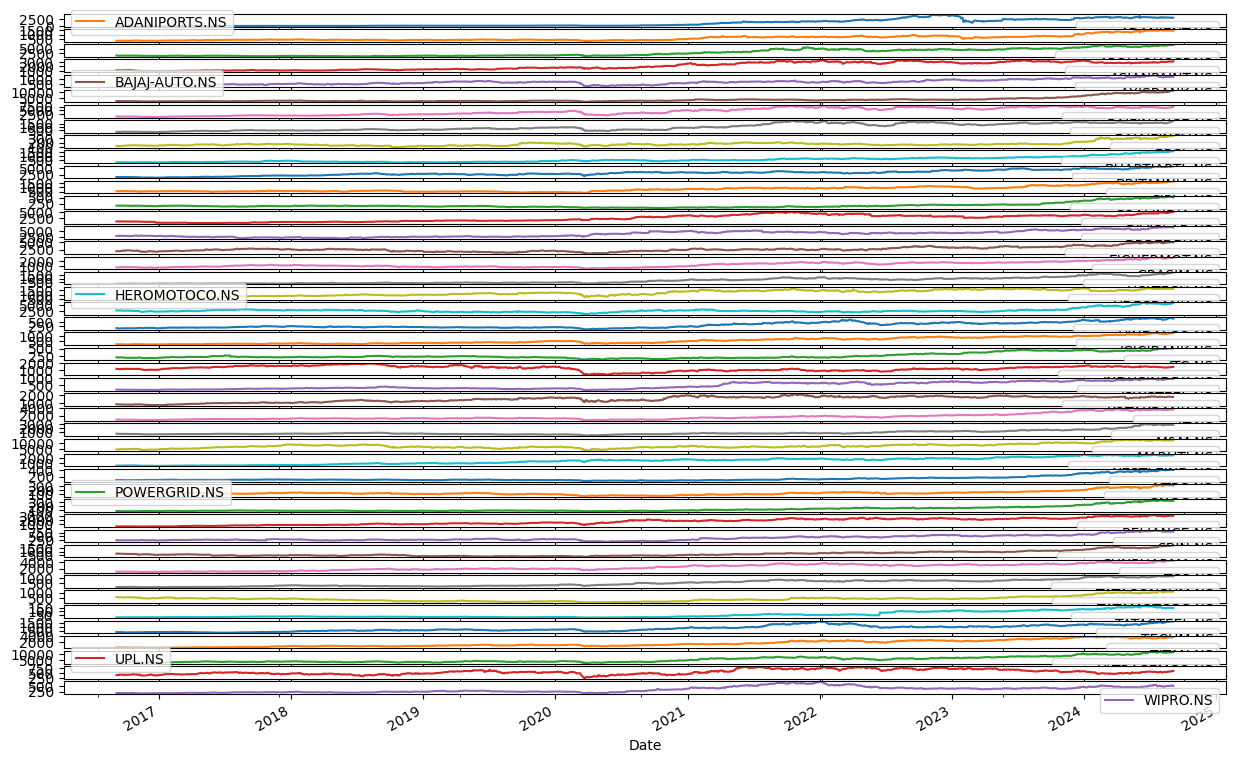

In [11]:
# Plot the closing prices for each stock
df.plot(subplots=True, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [12]:
# Calculate monthly returns
monthly_returns = df.resample('M').ffill().pct_change()
monthly_returns = monthly_returns.dropna(axis=0, how='all')

# Display the monthly returns DataFrame
monthly_returns.head()


ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2016-10-31     0.018265       0.195716       0.020253      -0.078229   
2016-11-30     0.017190      -0.094788      -0.107985      -0.091216   
2016-12-31     0.124908      -0.034005      -0.012884      -0.081297   
2017-01-31     0.138472       0.092755       0.042504       0.089389   
2017-02-28     0.130235       0.028635       0.058209       0.055115   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BAJAJFINSV.NS  \
Date                                                                   
2016-10-31    -0.100582       0.007250       0.015768       0.102181   
2016-11-30    -0.035017      -0.057214      -0.142418      -0.116221   
2016-12-31    -0.042354      -0.019720      -0.084366      -0.031823   
2017-01-31     0.035671       0.076457       0.231180       0.121250   
2017-02-28     0.087232      -0.027370       0.068762       0.205894   

             BPCL.NS  BHARTIARTL.NS  ...  SUNPHARMA.NS    TCS.NS  \
Date                                 ...                           
2016-10-31  0.092148       0.015446  ...      0.000943 -0.010558   
2016-11-30 -0.037515       0.018034  ...     -0.045198 -0.051132   
2016-12-31 -0.013122      -0.058380  ...     -0.112426  0.039323   
2017-01-31  0.072620       0.139212  ...      0.002381 -0.054698   
2017-02-28  0.010835       0.048679  ...      0.075218  0.106041   

            TATACONSUM.NS  TATAMOTORS.NS  TATASTEEL.NS  TECHM.NS  TITAN.NS  \
Date                                                                         
2016-10-31       0.002507       0.004020      0.083366  0.037632 -0.054543   
2016-11-30      -0.115041      -0.144693      0.023678  0.113738 -0.133985   
2016-12-31      -0.014937       0.027651     -0.057343  0.007626  0.010201   
2017-01-31       0.056148       0.109216      0.183515 -0.075067  0.107864   
2017-02-28       0.071401      -0.127591      0.042436  0.104379  0.207568   

            ULTRACEMCO.NS    UPL.NS  WIPRO.NS  
Date                                           
2016-10-31       0.034051  0.035542 -0.035181  
2016-11-30      -0.095224 -0.091502  0.006817  
2016-12-31      -0.098031  0.020585  0.019774  
2017-01-31       0.136684  0.120170 -0.034672  
2017-02-28       0.021681 -0.008900  0.071950  

[5 rows x 45 columns]

<ipython-input-13-57a814e5a630>:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


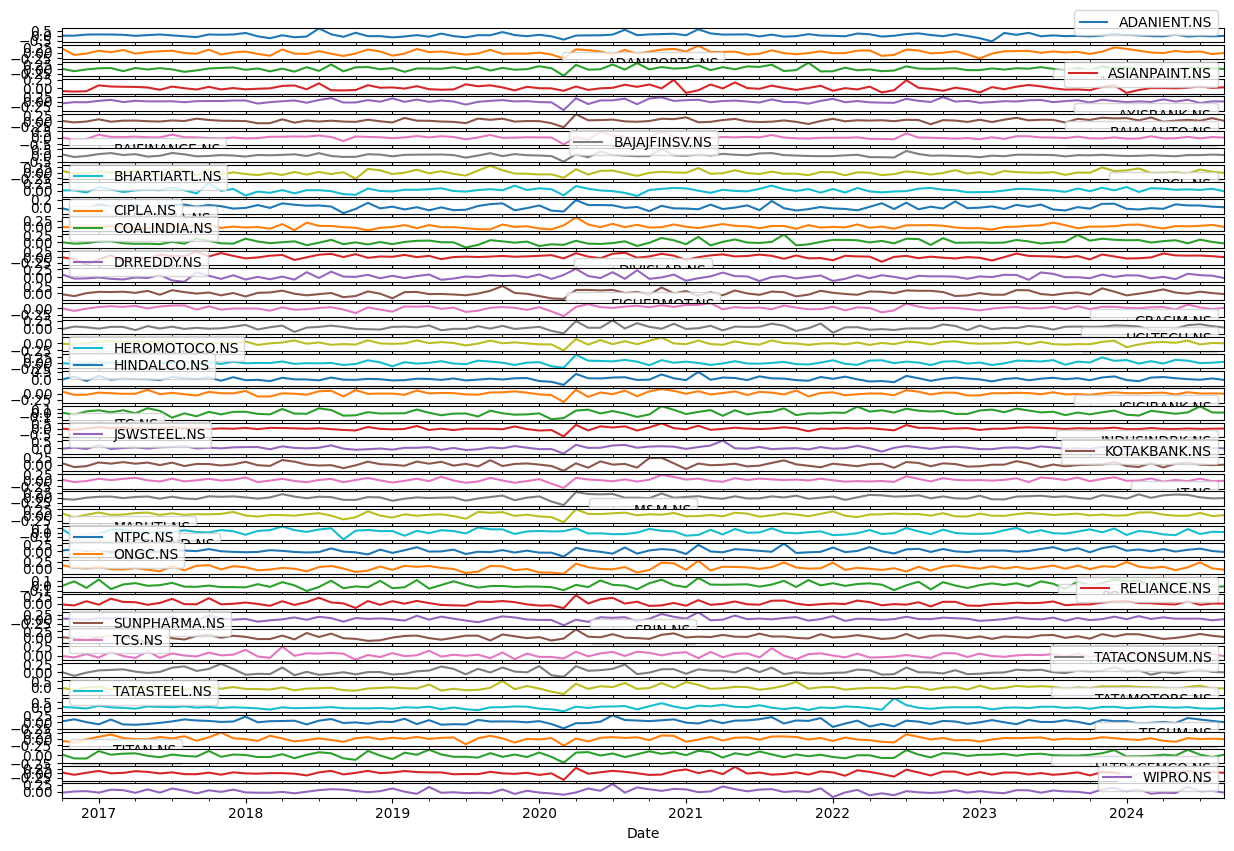

In [13]:
# Plot the monthly returns over time on separate subplots
monthly_returns.plot(subplots=True, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [14]:
# Get the Fama French data
from google.colab import files
ff5 = files.upload()

Saving F-F_Research_Data_5_Factors_2x3_daily.CSV to F-F_Research_Data_5_Factors_2x3_daily (1).CSV


In [15]:
ff5_data = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows=3,index_col=0)
ff5_data.head()

Mkt-RF   SMB   HML   RMW   CMA     RF
19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012
19630705    0.40  0.09 -0.28  0.07 -0.30  0.012
19630708   -0.63  0.07 -0.20 -0.27  0.06  0.012

In [16]:
ff5_data = pd.DataFrame(ff5_data)
ff5_data.index = pd.to_datetime(ff5_data.index, format='%Y%m%d')
ff5_data = ff5_data.resample('M').last()
ff5_data.head()

Mkt-RF   SMB   HML   RMW   CMA     RF
1963-07-31   -0.13  0.11 -0.03 -0.13  0.30  0.012
1963-08-31    0.44  0.15 -0.13  0.15 -0.21  0.011
1963-09-30   -0.60  0.21  0.08  0.24  0.13  0.014
1963-10-31    0.21 -0.03  0.08  0.10 -0.26  0.013
1963-11-30    1.34  0.30  0.29 -0.31 -0.15  0.015

In [17]:
# Filter ff5_data to match the time period of monthly_returns
ff5_data_subset = ff5_data[ff5_data.index.isin(monthly_returns.index)]
ff5_data_subset.head()

Mkt-RF   SMB   HML   RMW   CMA     RF
2016-10-31    0.02  0.11  0.10  0.48 -0.34  0.001
2016-11-30   -0.25 -0.17  2.21 -1.43  1.99  0.001
2016-12-31   -0.52 -0.06  0.20 -0.11  0.03  0.001
2017-01-31    0.00  0.81 -0.56 -0.39 -0.25  0.002
2017-02-28   -0.42 -1.36  0.16 -0.01 -0.20  0.002

In [18]:
# Check dimensions and date ranges
print("Dimensions of ff5_data_subset:", ff5_data_subset.shape)
print("Dimensions of monthly_returns:", monthly_returns.shape)
print("Start date of ff5_data_subset:", ff5_data_subset.index.min())
print("End date of ff5_data_subset:", ff5_data_subset.index.max())
print("Start date of monthly_returns:", monthly_returns.index.min())
print("End date of monthly_returns:", monthly_returns.index.max())


Dimensions of ff5_data_subset: (93, 6)
Dimensions of monthly_returns: (96, 45)
Start date of ff5_data_subset: 2016-10-31 00:00:00
End date of ff5_data_subset: 2024-06-30 00:00:00
Start date of monthly_returns: 2016-10-31 00:00:00
End date of monthly_returns: 2024-09-30 00:00:00


In [19]:
# Drop the last 3 entries of the monthly returns
monthly_returns = monthly_returns[:-3]


In [20]:
# Calculate excess returns
excess_returns = monthly_returns.copy()
for col in excess_returns.columns:
  excess_returns[col] = excess_returns[col] - ff5_data_subset['RF'] / 100
excess_returns.head()

ADANIENT.NS  ADANIPORTS.NS  APOLLOHOSP.NS  ASIANPAINT.NS  \
Date                                                                   
2016-10-31     0.018255       0.195706       0.020243      -0.078239   
2016-11-30     0.017180      -0.094798      -0.107995      -0.091226   
2016-12-31     0.124898      -0.034015      -0.012894      -0.081307   
2017-01-31     0.138452       0.092735       0.042484       0.089369   
2017-02-28     0.130215       0.028615       0.058189       0.055095   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BAJAJFINSV.NS  \
Date                                                                   
2016-10-31    -0.100592       0.007240       0.015758       0.102171   
2016-11-30    -0.035027      -0.057224      -0.142428      -0.116231   
2016-12-31    -0.042364      -0.019730      -0.084376      -0.031833   
2017-01-31     0.035651       0.076437       0.231160       0.121230   
2017-02-28     0.087212      -0.027390       0.068742       0.205874   

             BPCL.NS  BHARTIARTL.NS  ...  SUNPHARMA.NS    TCS.NS  \
Date                                 ...                           
2016-10-31  0.092138       0.015436  ...      0.000933 -0.010568   
2016-11-30 -0.037525       0.018024  ...     -0.045208 -0.051142   
2016-12-31 -0.013132      -0.058390  ...     -0.112436  0.039313   
2017-01-31  0.072600       0.139192  ...      0.002361 -0.054718   
2017-02-28  0.010815       0.048659  ...      0.075198  0.106021   

            TATACONSUM.NS  TATAMOTORS.NS  TATASTEEL.NS  TECHM.NS  TITAN.NS  \
Date                                                                         
2016-10-31       0.002497       0.004010      0.083356  0.037622 -0.054553   
2016-11-30      -0.115051      -0.144703      0.023668  0.113728 -0.133995   
2016-12-31      -0.014947       0.027641     -0.057353  0.007616  0.010191   
2017-01-31       0.056128       0.109196      0.183495 -0.075087  0.107844   
2017-02-28       0.071381      -0.127611      0.042416  0.104359  0.207548   

            ULTRACEMCO.NS    UPL.NS  WIPRO.NS  
Date                                           
2016-10-31       0.034041  0.035532 -0.035191  
2016-11-30      -0.095234 -0.091512  0.006807  
2016-12-31      -0.098041  0.020575  0.019764  
2017-01-31       0.136664  0.120150 -0.034692  
2017-02-28       0.021661 -0.008920  0.071930  

[5 rows x 45 columns]

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ff5_data_subset, excess_returns, test_size=0.2, shuffle=False)


In [22]:
# Fit the OLS regression model for each stock
results = {}
for stock in excess_returns.columns:
  y = y_train[stock]
  X = sm.add_constant(X_train.drop('RF', axis=1))  # Add a constant to the independent variables
  model = sm.OLS(y, X)
  results[stock] = model.fit()


In [23]:
# Print the results summary for each model
for stock, result in results.items():
  print(f"Results for {stock}:")
  print(result.summary())
  print("\n")

Results for ADANIENT.NS:
                            OLS Regression Results                            
Dep. Variable:            ADANIENT.NS   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.107
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.365
Time:                        11:16:15   Log-Likelihood:                 28.220
No. Observations:                  74   AIC:                            -44.44
Df Residuals:                      68   BIC:                            -30.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0560      

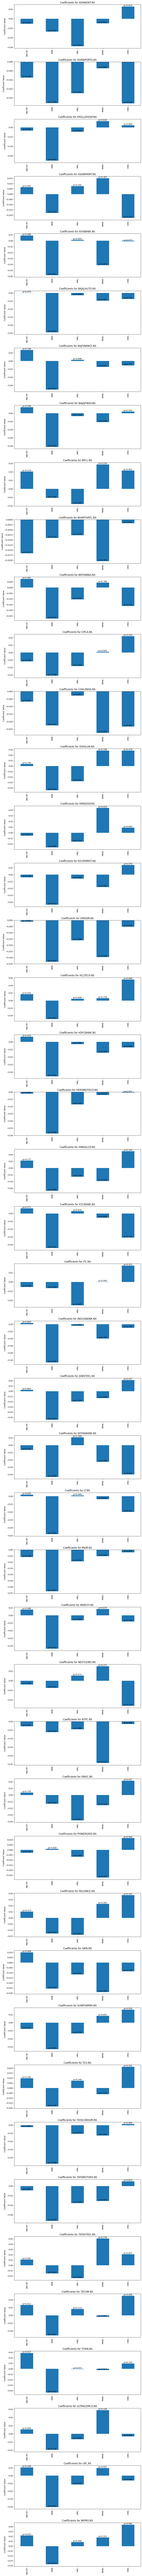

In [24]:
# Plot the coefficients for each model along with the p-values on subplots
fig, axes = plt.subplots(nrows=len(results), ncols=1, figsize=(10, 4 * len(results)))

for i, (stock, result) in enumerate(results.items()):
  ax = axes[i]
  # Get coefficients and p-values
  coefficients = result.params.drop('const')
  p_values = result.pvalues.drop('const')

  # Create bar plot for coefficients
  coefficients.plot(kind='bar', ax=ax)
  ax.set_title(f"Coefficients for {stock}")
  ax.set_ylabel("Coefficient Value")

  # Add p-values as text above the bars
  for j, p_val in enumerate(p_values):
    ax.text(j, coefficients.iloc[j], f"p={p_val:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


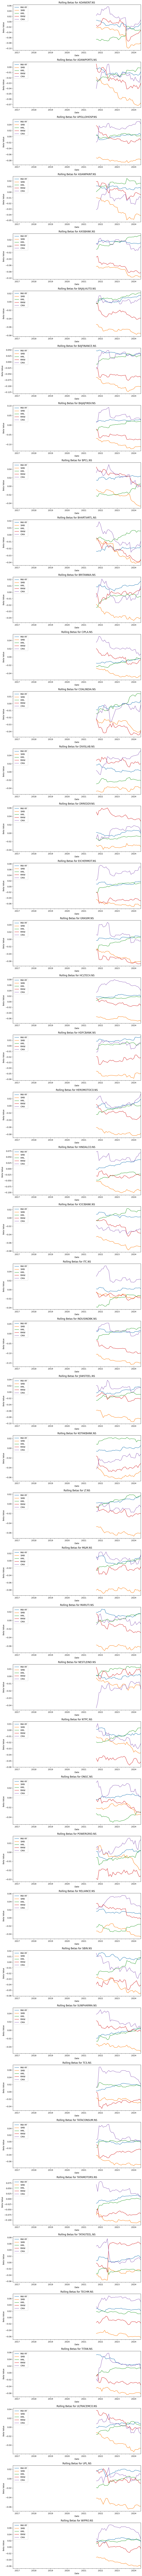

In [25]:
# Calculate rolling betas
rolling_betas = {}
window = 60  # Set the rolling window size

for stock in excess_returns.columns:
  rolling_betas[stock] = pd.DataFrame(index=excess_returns.index, columns=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'])
  for i in range(window, len(excess_returns)):
    y = excess_returns[stock].iloc[i - window:i]
    X = sm.add_constant(ff5_data_subset.drop('RF', axis=1).iloc[i - window:i])
    model = sm.OLS(y, X).fit()
    rolling_betas[stock].iloc[i] = model.params.drop('const')

# Plot the rolling betas for each factor on separate subplots
fig, axes = plt.subplots(nrows=len(rolling_betas), ncols=1, figsize=(10, 4 * len(rolling_betas)))

for i, (stock, betas) in enumerate(rolling_betas.items()):
  ax = axes[i]
  betas.plot(ax=ax)
  ax.set_title(f"Rolling Betas for {stock}")
  ax.set_ylabel("Beta Value")

plt.tight_layout()
plt.show()


In [26]:
# Make predictions on the test set
predictions = {}
for stock, result in results.items():
  X_test_const = sm.add_constant(X_test.drop('RF', axis=1))  # Add constant to test set
  predictions[stock] = result.predict(X_test_const)


In [27]:
# Calculate performance metrics for each stock
performance_metrics = {}
for stock in excess_returns.columns:
  r2 = r2_score(y_test[stock], predictions[stock])
  mse = mean_squared_error(y_test[stock], predictions[stock])
  rmse = mean_squared_error(y_test[stock], predictions[stock], squared=False)
  mae = mean_absolute_error(y_test[stock], predictions[stock])
  performance_metrics[stock] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Calculate overall performance metrics
all_predictions = pd.concat(predictions.values(), axis=1)
all_y_test = y_test.values.flatten()
overall_r2 = r2_score(all_y_test, all_predictions.values.flatten())
overall_mse = mean_squared_error(all_y_test, all_predictions.values.flatten())
overall_rmse = mean_squared_error(all_y_test, all_predictions.values.flatten(), squared=False)
overall_mae = mean_absolute_error(all_y_test, all_predictions.values.flatten())

# Create a DataFrame to display the results
performance_df = pd.DataFrame(performance_metrics).transpose()
performance_df.loc['Overall'] = [overall_r2, overall_mse, overall_rmse, overall_mae]
print(performance_df)


               R-squared       MSE      RMSE       MAE
ADANIENT.NS    -0.044228  0.033333  0.182573  0.123378
ADANIPORTS.NS   0.049850  0.009207  0.095951  0.076405
APOLLOHOSP.NS  -0.153270  0.004546  0.067427  0.059284
ASIANPAINT.NS  -0.221856  0.004340  0.065882  0.052884
AXISBANK.NS    -0.012905  0.002700  0.051959  0.037254
BAJAJ-AUTO.NS  -0.752049  0.007168  0.084663  0.071083
BAJFINANCE.NS  -0.699034  0.007878  0.088756  0.083678
BAJAJFINSV.NS  -0.564232  0.004571  0.067607  0.058275
BPCL.NS        -0.105133  0.007259  0.085202  0.057826
BHARTIARTL.NS   0.004867  0.002996  0.054737  0.045995
BRITANNIA.NS   -0.022767  0.002752  0.052456  0.042997
CIPLA.NS       -0.268782  0.005480  0.074025  0.053785
COALINDIA.NS   -0.387384  0.007851  0.088604  0.059307
DIVISLAB.NS    -0.051144  0.006377  0.079857  0.063819
DRREDDY.NS     -0.525203  0.005966  0.077239  0.060692
EICHERMOT.NS    0.005912  0.005545  0.074465  0.060406
GRASIM.NS      -0.507371  0.004062  0.063735  0.049007
HCLTECH.NS

In [28]:
# Filter stocks with positive out-of-sample R-squared values
positive_r2_stocks = performance_df[performance_df['R-squared'] > 0].index.tolist()

# Create a DataFrame to store coefficients and p-values
results_df = pd.DataFrame(index=positive_r2_stocks, columns=['Mkt-RF (coef)', 'Mkt-RF (p-val)', 'SMB (coef)', 'SMB (p-val)',
                                                            'HML (coef)', 'HML (p-val)', 'RMW (coef)', 'RMW (p-val)',
                                                            'CMA (coef)', 'CMA (p-val)'])

# Populate the DataFrame with coefficients and p-values
for stock in positive_r2_stocks:
  result = results[stock]
  results_df.loc[stock, 'Mkt-RF (coef)'] = result.params['Mkt-RF']
  results_df.loc[stock, 'Mkt-RF (p-val)'] = result.pvalues['Mkt-RF']
  results_df.loc[stock, 'SMB (coef)'] = result.params['SMB']
  results_df.loc[stock, 'SMB (p-val)'] = result.pvalues['SMB']
  results_df.loc[stock, 'HML (coef)'] = result.params['HML']
  results_df.loc[stock, 'HML (p-val)'] = result.pvalues['HML']
  results_df.loc[stock, 'RMW (coef)'] = result.params['RMW']
  results_df.loc[stock, 'RMW (p-val)'] = result.pvalues['RMW']
  results_df.loc[stock, 'CMA (coef)'] = result.params['CMA']
  results_df.loc[stock, 'CMA (p-val)'] = result.pvalues['CMA']

# Display the results DataFrame
print(results_df)


              Mkt-RF (coef) Mkt-RF (p-val) SMB (coef) SMB (p-val) HML (coef)  \
ADANIPORTS.NS     -0.008777       0.499437  -0.022872     0.24583    -0.0174   
BHARTIARTL.NS     -0.016564       0.127291  -0.009043    0.578983  -0.007678   
EICHERMOT.NS      -0.003933       0.729556  -0.043526     0.01331  -0.005664   
NESTLEIND.NS      -0.003944        0.59456  -0.007535    0.501345   0.005376   
TATACONSUM.NS     -0.002292       0.843645  -0.047505    0.008394  -0.010661   

              HML (p-val) RMW (coef) RMW (p-val) CMA (coef) CMA (p-val)  
ADANIPORTS.NS    0.297433  -0.003566    0.881711  -0.023039    0.419511  
BHARTIARTL.NS    0.578574  -0.020501    0.304643  -0.001752    0.940895  
EICHERMOT.NS     0.697756  -0.017997    0.392805   0.013958    0.576337  
NESTLEIND.NS     0.571456   0.015123     0.27086  -0.026251    0.109432  
TATACONSUM.NS    0.474981  -0.012832     0.55044   0.001394    0.956404  


In [29]:
# Create trading signals based on predicted returns
trading_signals = {}
for stock in positive_r2_stocks:
  signal = np.where(predictions[stock] > 0, 1, -1)  # Buy (1) if predicted return is positive, sell (-1) otherwise
  trading_signals[stock] = pd.Series(signal, index=y_test.index)

# Print the trading signals for each stock
for stock, signals in trading_signals.items():
  print(f"Trading Signals for {stock}:")
  print(signals)
  print("\n")


Trading Signals for ADANIPORTS.NS:
Date
2022-12-31    1
2023-01-31   -1
2023-02-28    1
2023-03-31    1
2023-04-30   -1
2023-05-31    1
2023-06-30    1
2023-07-31   -1
2023-08-31    1
2023-09-30    1
2023-10-31    1
2023-11-30    1
2023-12-31    1
2024-01-31    1
2024-02-29    1
2024-03-31   -1
2024-04-30    1
2024-05-31   -1
2024-06-30   -1
Freq: M, dtype: int64


Trading Signals for BHARTIARTL.NS:
Date
2022-12-31    1
2023-01-31   -1
2023-02-28    1
2023-03-31   -1
2023-04-30   -1
2023-05-31    1
2023-06-30    1
2023-07-31    1
2023-08-31    1
2023-09-30    1
2023-10-31    1
2023-11-30    1
2023-12-31    1
2024-01-31    1
2024-02-29   -1
2024-03-31    1
2024-04-30    1
2024-05-31   -1
2024-06-30    1
Freq: M, dtype: int64


Trading Signals for EICHERMOT.NS:
Date
2022-12-31    1
2023-01-31   -1
2023-02-28   -1
2023-03-31   -1
2023-04-30   -1
2023-05-31    1
2023-06-30    1
2023-07-31   -1
2023-08-31    1
2023-09-30    1
2023-10-31    1
2023-11-30    1
2023-12-31    1
2024-01-31    1
2

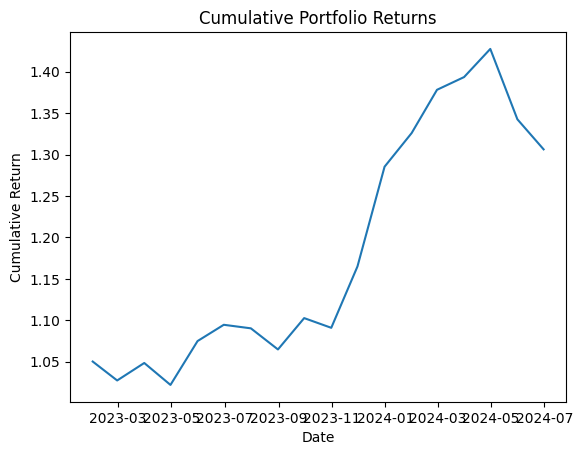

Final Portfolio Value: $ 1289773.6
Portfolio Returns: [ 0.05016206 -0.0217669   0.02054967 -0.02526556  0.05181204  0.01827697
 -0.00391044 -0.02338312  0.03554485 -0.010634    0.06793358  0.10332166
  0.03161761  0.03936894  0.01115417  0.02438543 -0.05951601 -0.02702426]


In [30]:
# Calculate initial investment per stock
initial_investment_per_stock = 1000000 / len(positive_r2_stocks)

# Initialize portfolio values
portfolio_values = {stock: [initial_investment_per_stock] for stock in positive_r2_stocks}

# Iterate through time and apply trading strategy
for i in range(1, len(y_test)):
  for stock in positive_r2_stocks:
    prev_value = portfolio_values[stock][-1]
    signal = trading_signals[stock].iloc[i]
    return_ = y_test[stock].iloc[i]

    if signal == 1:  # Buy
      new_value = prev_value * (1 + return_) * (1 - 0.01)  # Deduct 1% transaction cost
    elif signal == -1:  # Sell
      new_value = prev_value * (1 - return_) * (1 - 0.01)  # Deduct 1% transaction cost
    else:  # Hold
      new_value = prev_value * (1 + return_)

    portfolio_values[stock].append(new_value)

# Calculate portfolio returns
portfolio_returns = []
for i in range(1, len(y_test)):
  period_return = 0
  for stock in positive_r2_stocks:
    period_return += (portfolio_values[stock][i] - portfolio_values[stock][i - 1]) / portfolio_values[stock][i - 1]
  portfolio_returns.append(period_return / len(positive_r2_stocks))  # Average return across stocks

# Plot cumulative returns
cumulative_returns = (1 + np.array(portfolio_returns)).cumprod()
plt.plot(y_test.index[1:], cumulative_returns)
plt.title("Cumulative Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

# Calculate final portfolio value
final_portfolio_value = sum(portfolio_values[stock][-1] for stock in positive_r2_stocks)
print("Final Portfolio Value: $", round(final_portfolio_value, 2))

# Return array of portfolio returns
print("Portfolio Returns:", np.array(portfolio_returns))


In [31]:
# Calculate Sharpe Ratio
excess_portfolio_returns = np.array(portfolio_returns) - ff5_data_subset['RF'].iloc[-len(portfolio_returns):] / 100
sharpe_ratio = np.mean(excess_portfolio_returns) / np.std(excess_portfolio_returns) * np.sqrt(12)  # Annualized
print("Sharpe Ratio:", sharpe_ratio)

# Calculate Max Drawdown
cumulative_returns = (1 + np.array(portfolio_returns)).cumprod()
peak = np.maximum.accumulate(cumulative_returns)
drawdowns = (cumulative_returns - peak) / peak
max_drawdown = np.min(drawdowns)
print("Max Drawdown:", max_drawdown)

# Calculate Calmar Ratio
annualized_return = (cumulative_returns[-1] ** (12 / len(cumulative_returns)) - 1)
calmar_ratio = annualized_return / abs(max_drawdown)
print("Calmar Ratio:", calmar_ratio)

# Calculate Sortino Ratio
downside_returns = np.where(excess_portfolio_returns < 0, excess_portfolio_returns, 0)
downside_std = np.std(downside_returns) * np.sqrt(12)  # Annualized
sortino_ratio = np.mean(excess_portfolio_returns) / downside_std
print("Sortino Ratio:", sortino_ratio)


Sharpe Ratio: 1.3764229520434983
Max Drawdown: -0.08493189483166674
Calmar Ratio: 2.2957176152611303
Sortino Ratio: 0.28408432629096897


In [32]:
# Fit the OLS regression model for each stock using only Mkt-RF, SMB, and HML
results_new = {}
for stock in excess_returns.columns:
  y = y_train[stock]
  X = sm.add_constant(X_train[['Mkt-RF', 'SMB', 'HML']])  # Use only Mkt-RF, SMB, and HML as regressors
  model = sm.OLS(y, X)
  results_new[stock] = model.fit()

# Print the results summary for each model
for stock, result in results_new.items():
  print(f"Results for {stock} (with Mkt-RF, SMB, HML):")
  print(result.summary())
  print("\n")


Results for ADANIENT.NS (with Mkt-RF, SMB, HML):
                            OLS Regression Results                            
Dep. Variable:            ADANIENT.NS   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.776
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.160
Time:                        11:17:40   Log-Likelihood:                 28.038
No. Observations:                  74   AIC:                            -48.08
Df Residuals:                      70   BIC:                            -38.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

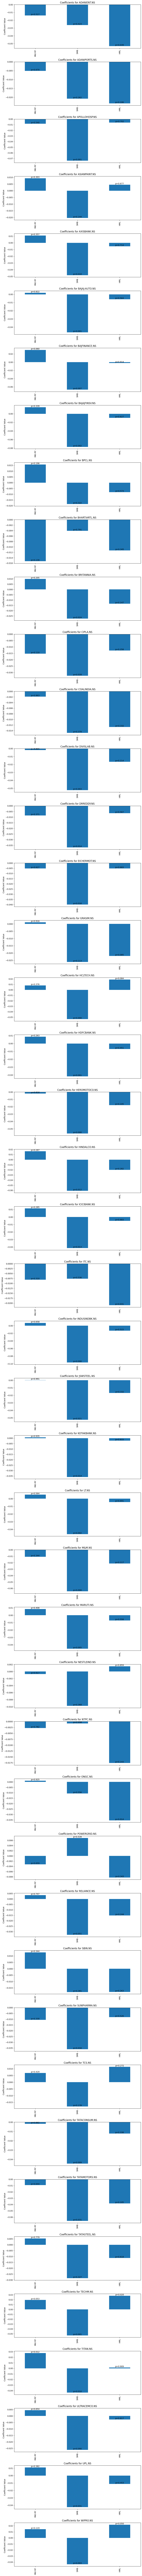

In [33]:
# Plot the coefficients for each model along with the p-values on subplots
fig, axes = plt.subplots(nrows=len(results_new), ncols=1, figsize=(10, 4 * len(results_new)))

for i, (stock, result) in enumerate(results_new.items()):
  ax = axes[i]
  # Get coefficients and p-values
  coefficients = result.params.drop('const')
  p_values = result.pvalues.drop('const')

  # Create bar plot for coefficients
  coefficients.plot(kind='bar', ax=ax)
  ax.set_title(f"Coefficients for {stock}")
  ax.set_ylabel("Coefficient Value")

  # Add p-values as text above the bars
  for j, p_val in enumerate(p_values):
    ax.text(j, coefficients.iloc[j], f"p={p_val:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


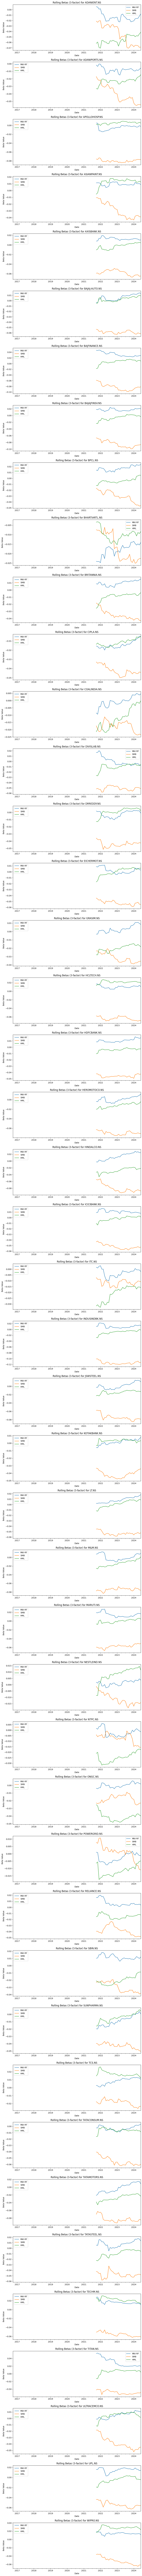

In [34]:
# Calculate rolling betas for the three-factor model
rolling_betas_3factor = {}
window = 60  # Set the rolling window size

for stock in excess_returns.columns:
  rolling_betas_3factor[stock] = pd.DataFrame(index=excess_returns.index, columns=['Mkt-RF', 'SMB', 'HML'])
  for i in range(window, len(excess_returns)):
    y = excess_returns[stock].iloc[i - window:i]
    X = sm.add_constant(ff5_data_subset[['Mkt-RF', 'SMB', 'HML']].iloc[i - window:i])
    model = sm.OLS(y, X).fit()
    rolling_betas_3factor[stock].iloc[i] = model.params.drop('const')

# Plot the rolling betas for each factor on separate subplots
fig, axes = plt.subplots(nrows=len(rolling_betas_3factor), ncols=1, figsize=(10, 4 * len(rolling_betas_3factor)))

for i, (stock, betas) in enumerate(rolling_betas_3factor.items()):
  ax = axes[i]
  betas.plot(ax=ax)
  ax.set_title(f"Rolling Betas (3-factor) for {stock}")
  ax.set_ylabel("Beta Value")

plt.tight_layout()
plt.show()


In [35]:
# Make predictions on the test set using the three-factor model
predictions_3factor = {}
for stock, result in results_new.items():
  X_test_const = sm.add_constant(X_test[['Mkt-RF', 'SMB', 'HML']])  # Use only Mkt-RF, SMB, and HML for prediction
  predictions_3factor[stock] = result.predict(X_test_const)

# Calculate performance metrics for each stock using the three-factor model
performance_metrics_3factor = {}
for stock in excess_returns.columns:
  r2 = r2_score(y_test[stock], predictions_3factor[stock])
  mse = mean_squared_error(y_test[stock], predictions_3factor[stock])
  rmse = mean_squared_error(y_test[stock], predictions_3factor[stock], squared=False)
  mae = mean_absolute_error(y_test[stock], predictions_3factor[stock])
  performance_metrics_3factor[stock] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Calculate overall performance metrics for the three-factor model
all_predictions_3factor = pd.concat(predictions_3factor.values(), axis=1)
overall_r2_3factor = r2_score(all_y_test, all_predictions_3factor.values.flatten())
overall_mse_3factor = mean_squared_error(all_y_test, all_predictions_3factor.values.flatten())
overall_rmse_3factor = mean_squared_error(all_y_test, all_predictions_3factor.values.flatten(), squared=False)
overall_mae_3factor = mean_absolute_error(all_y_test, all_predictions_3factor.values.flatten())

# Create a DataFrame to display the results for the three-factor model
performance_df_3factor = pd.DataFrame(performance_metrics_3factor).transpose()
performance_df_3factor.loc['Overall'] = [overall_r2_3factor, overall_mse_3factor, overall_rmse_3factor, overall_mae_3factor]
print(performance_df_3factor)


               R-squared       MSE      RMSE       MAE
ADANIENT.NS    -0.031413  0.032924  0.181449  0.121434
ADANIPORTS.NS   0.070763  0.009004  0.094889  0.076362
APOLLOHOSP.NS  -0.159091  0.004569  0.067597  0.059215
ASIANPAINT.NS  -0.099658  0.003906  0.062501  0.048445
AXISBANK.NS    -0.097012  0.002924  0.054073  0.040150
BAJAJ-AUTO.NS  -0.737497  0.007108  0.084311  0.070701
BAJFINANCE.NS  -0.687199  0.007823  0.088446  0.083977
BAJAJFINSV.NS  -0.670693  0.004882  0.069870  0.060280
BPCL.NS        -0.056530  0.006940  0.083308  0.056490
BHARTIARTL.NS   0.028700  0.002924  0.054078  0.046606
BRITANNIA.NS    0.072251  0.002496  0.049960  0.042002
CIPLA.NS       -0.236232  0.005339  0.073069  0.054229
COALINDIA.NS   -0.365366  0.007726  0.087898  0.058378
DIVISLAB.NS    -0.175859  0.007134  0.084461  0.066501
DRREDDY.NS     -0.423373  0.005568  0.074616  0.060541
EICHERMOT.NS   -0.001594  0.005587  0.074745  0.059957
GRASIM.NS      -0.499142  0.004040  0.063561  0.048132
HCLTECH.NS

In [36]:
# Filter stocks with positive out-of-sample R-squared values
positive_r2_stocks = performance_df[performance_df['R-squared'] > 0].index.tolist()

# Create a DataFrame to store coefficients and performance metrics
results_df = pd.DataFrame(index=positive_r2_stocks, columns=['R-squared', 'MSE', 'RMSE', 'MAE'])

# Populate the DataFrame with coefficients and p-values
for stock in positive_r2_stocks:
  results_df.loc[stock, 'R-squared'] = performance_df.loc[stock, 'R-squared']
  results_df.loc[stock, 'MSE'] = performance_df.loc[stock, 'MSE']
  results_df.loc[stock, 'RMSE'] = performance_df.loc[stock, 'RMSE']
  results_df.loc[stock, 'MAE'] = performance_df.loc[stock, 'MAE']

# Display the results DataFrame
print(results_df)


              R-squared       MSE      RMSE       MAE
ADANIPORTS.NS   0.04985  0.009207  0.095951  0.076405
BHARTIARTL.NS  0.004867  0.002996  0.054737  0.045995
EICHERMOT.NS   0.005912  0.005545  0.074465  0.060406
NESTLEIND.NS    0.01953  0.002612  0.051109  0.041529
TATACONSUM.NS  0.274072  0.002294  0.047897    0.0393


In [37]:
# Create a DataFrame to store coefficients and p-values
results_df = pd.DataFrame(index=positive_r2_stocks, columns=['Mkt-RF (coef)', 'Mkt-RF (p-val)', 'SMB (coef)', 'SMB (p-val)',
                                                            'HML (coef)', 'HML (p-val)', 'RMW (coef)', 'RMW (p-val)',
                                                            'CMA (coef)', 'CMA (p-val)'])

# Populate the DataFrame with coefficients and p-values
for stock in positive_r2_stocks:
  result = results[stock]
  results_df.loc[stock, 'Mkt-RF (coef)'] = result.params['Mkt-RF']
  results_df.loc[stock, 'Mkt-RF (p-val)'] = result.pvalues['Mkt-RF']
  results_df.loc[stock, 'SMB (coef)'] = result.params['SMB']
  results_df.loc[stock, 'SMB (p-val)'] = result.pvalues['SMB']
  results_df.loc[stock, 'HML (coef)'] = result.params['HML']
  results_df.loc[stock, 'HML (p-val)'] = result.pvalues['HML']
  results_df.loc[stock, 'RMW (coef)'] = result.params['RMW']
  results_df.loc[stock, 'RMW (p-val)'] = result.pvalues['RMW']
  results_df.loc[stock, 'CMA (coef)'] = result.params['CMA']
  results_df.loc[stock, 'CMA (p-val)'] = result.pvalues['CMA']

# Display the results DataFrame
print(results_df)


              Mkt-RF (coef) Mkt-RF (p-val) SMB (coef) SMB (p-val) HML (coef)  \
ADANIPORTS.NS     -0.008777       0.499437  -0.022872     0.24583    -0.0174   
BHARTIARTL.NS     -0.016564       0.127291  -0.009043    0.578983  -0.007678   
EICHERMOT.NS      -0.003933       0.729556  -0.043526     0.01331  -0.005664   
NESTLEIND.NS      -0.003944        0.59456  -0.007535    0.501345   0.005376   
TATACONSUM.NS     -0.002292       0.843645  -0.047505    0.008394  -0.010661   

              HML (p-val) RMW (coef) RMW (p-val) CMA (coef) CMA (p-val)  
ADANIPORTS.NS    0.297433  -0.003566    0.881711  -0.023039    0.419511  
BHARTIARTL.NS    0.578574  -0.020501    0.304643  -0.001752    0.940895  
EICHERMOT.NS     0.697756  -0.017997    0.392805   0.013958    0.576337  
NESTLEIND.NS     0.571456   0.015123     0.27086  -0.026251    0.109432  
TATACONSUM.NS    0.474981  -0.012832     0.55044   0.001394    0.956404  
